In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing,decomposition
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt


In [73]:
data = pd.read_csv('X_data_20_0_0.csv')
#data = pd.get_dummies(data)
data = data.drop(['0','1'], axis=1)
X = data
pca = decomposition.PCA(n_components=4, svd_solver='full')
#X = pd.DataFrame(pca.fit_transform(X))
labels = pd.read_csv('y_data_20_0_0.csv')
y = labels['team1_pts']+labels['team2_pts']
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.4,shuffle=False)
#X_valid, X_test, y_valid, y_test = train_test_split( X_valid, y_valid, test_size=0.5,shuffle=False)
WIDTH = len(X.columns.values)

In [67]:
X_train

,2,3,4,5,6,7,8,9,10,11,...,72,73,74,75,76,77,78,79,80,81
0,-6,-3,4,12,18,-13,-3,4,15,-10,...,0,0,0,0,0,0,0,0,0,0
1,-3,1,-6,8,3,-3,-10,4,8,-9,...,0,0,0,0,0,0,0,0,0,0
2,-3,0,-10,-7,5,3,-6,-3,11,-16,...,0,0,0,0,0,0,0,0,0,0
3,5,-3,11,-13,-6,-20,-13,6,-9,15,...,0,0,0,0,0,0,0,0,0,0
4,-6,-5,-3,-6,-17,21,-3,-20,7,-7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1,3,0,3,-8,-5,16,18,-14,-11,...,7,-7,5,-9,1,-6,8,-6,4,0
1870,-4,-10,-14,7,3,-14,-6,0,3,-14,...,-6,12,-9,5,-1,-16,-6,6,-7,1
1871,-6,-7,4,-1,1,3,-13,1,-6,-4,...,-10,-2,-7,0,4,-16,6,-6,11,-3
1872,0,-13,-1,4,0,2,1,4,-13,1,...,-17,-17,3,1,4,-6,14,-5,-20,-14


0.09041822561427537
-0.0009271286190184469


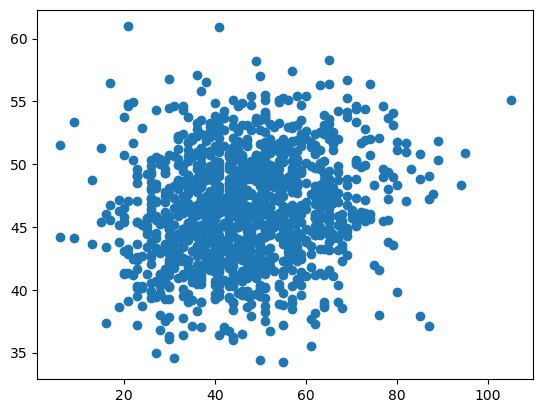

In [74]:
reg = Ridge().fit(X_train, y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_valid, y_valid))
y_pred = reg.predict(X_valid)

plt.scatter(y_valid, y_pred)

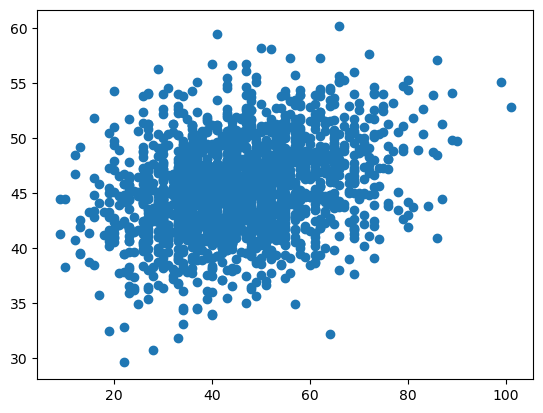

In [75]:
y_pred = reg.predict(X_train)

plt.scatter(y_train, y_pred)

0.09833333333333333
0.029925187032418952


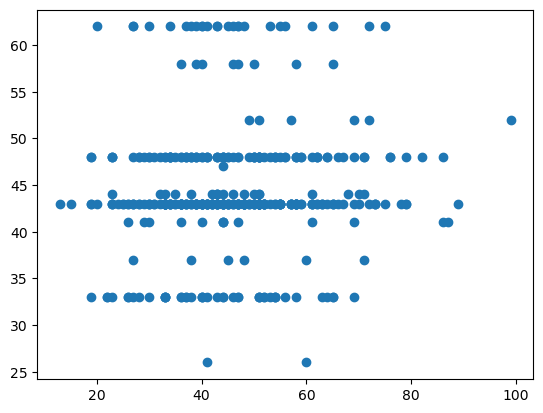

In [47]:
reg = RandomForestClassifier(n_estimators=100,min_samples_leaf=30,max_depth=3,bootstrap=True, oob_score=True).fit(X_train, y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_valid, y_valid))
y_pred = reg.predict(X_valid)

plt.scatter(y_valid, y_pred)

In [48]:
from sklearn import tree
reg = tree.DecisionTreeClassifier(min_samples_split=20,min_samples_leaf=4,max_depth=50,max_features=6).fit(X_train, y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_valid, y_valid))
#y_pred = reg.predict(X_test)
#plt.scatter(y_test, y_pred)

0.23666666666666666
0.032418952618453865


0.022443890274314215


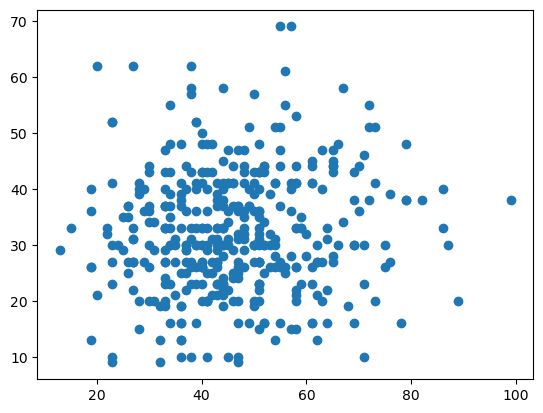

In [53]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print(clf.score(X_valid, y_valid))
y_pred = clf.predict(X_valid)
plt.scatter(y_valid, y_pred)